<a href="https://colab.research.google.com/github/tiwaomotosho/hackathons/blob/main/Financial_Inclusion_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background and Context

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### Objective

* The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account.
* The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

#### Data Dictionary

* country - Country interviewee is in.
* year - Year survey was done in.
* uniqueid - Unique identifier for each interviewee
* bank_account - Interviewee has Bank Account
* location_type - Type of location: Rural, Urban
* cellphone_access - If interviewee has access to a cellphone: Yes, No
* household_size - Number of people living in one house
* age_of_respondent - The age of the interviewee
* gender_of_respondent - Gender of interviewee: Male, Female
* relationship_with_head - The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
* marital_status - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
* education_level - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
* job_type - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer

## Overview of the dataset

**Let's start by importing libraries we need.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

from datetime import datetime

# To impute missing values
from sklearn.impute import KNNImputer, SimpleImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune model, get different metric scores and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.plots import plot_objective, plot_histogram
from skopt.utils import use_named_args
from skopt.plots import plot_evaluations
from skopt import gp_minimize
from skopt.plots import plot_convergence

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Coerce printing of floats in 2 d.p
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
#Loading dataset
data_init = pd.read_csv('account_train.csv')
test = pd.read_csv('account_test.csv')

# Create copy
data = data_init.copy()

**View the first 5 rows of the dataset.**

In [ ]:
data.head()

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.990,0.000,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.380,0.000,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.000,0.000,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.000,1.530,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.260,0.000,0,0,0


**Check data types and number of non-null values for each column.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

- We can see that there are total of 13 columns and 23,524 rows in the dataset.
- All columns data type is either integer or the object type.
- There are no null values in the dataset

In [ ]:
data.isna().sum()

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
Label                   0
dtype: int64

- There are no missing values in the data

**Check duplicates Count**

In [ ]:
data.duplicated().sum()

0

* Dataset contains no duplicates

### Fixing the data types

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['AccID', 'Category'], dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   AccID                 100476 non-null  category
 1   CategoryID            100476 non-null  int64   
 2   Category              100476 non-null  category
 3   Value                 100476 non-null  int64   
 4   PropertySize          100476 non-null  int64   
 5   BillingAmt            100476 non-null  int64   
 6   AverageBillingAmt     100476 non-null  int64   
 7   CollectedAmt          100476 non-null  int64   
 8   AverageCollectedAmt   100476 non-null  int64   
 9   DebtAmt               100476 non-null  int64   
 10  WriteOffAmt           100476 non-null  int64   
 11  CollectionRatio       100476 non-null  float64 
 12  DebtBillingRatio      100476 non-null  float64 
 13  TotalElectricityBill  100476 non-null  int64   
 14  HasID                 100476 non-nul

**Summary of the dataset**

In [ ]:
# Summary of continuous columns
data.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,"100,476.000",2.246,2.731,1.000,1.000,1.000,2.000,13.000
Value,"100,476.000","707,020.754","3,047,463.194",0.000,"35,000.000","93,000.000","750,000.000","421,860,000.000"
PropertySize,"100,476.000","746,822.707","5,651,558.437",0.000,276.000,511.000,"1,162.000","270,515,963.000"
BillingAmt,"100,476.000","10,899.514","126,234.137","-4,232,630.000",461.000,"3,141.000","8,715.000","26,133,617.000"
AverageBillingAmt,"100,476.000",575.486,"6,430.310","-79,384.000",23.000,107.000,281.000,"805,044.000"
CollectedAmt,"100,476.000","9,763.645","120,144.906","-219,260.000",0.000,360.000,"7,402.250","24,371,134.000"
AverageCollectedAmt,"100,476.000","2,044.688","36,824.866","-219,260.000",0.000,100.000,768.000,"6,828,297.000"
DebtAmt,"100,476.000","9,642.500","50,030.133",0.000,0.000,0.000,"2,298.000","6,322,610.000"
WriteOffAmt,"100,476.000",602.765,"14,409.152",0.000,0.000,0.000,0.000,"4,306,605.000"
CollectionRatio,"100,476.000",19.536,"5,556.991","-115,000.000",0.000,0.500,1.000,"1,701,912.000"


- Year should be a Categorical variable
- Household size is highly right skewed
- Age is highly right skewed

**Number of unique values in each column**

In [ ]:
data.nunique()

AccID                   100476
CategoryID                  12
Category                    12
Value                    10427
PropertySize             14208
BillingAmt               28464
AverageBillingAmt         5610
CollectedAmt             23605
AverageCollectedAmt       9044
DebtAmt                  20453
WriteOffAmt               5099
CollectionRatio           1682
DebtBillingRatio          6485
TotalElectricityBill     11211
HasID                        2
Label                        2
dtype: int64

## EDA

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Function to create barplots that indicate percentage for each category**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Defining Categorical variables
cat_col = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [ ]:
for item in cat_col:
    labeled_barplot(data, item, perc=True)

**Observations**

- Most of the customers have four credit cards
- Most of the customers have visited the bank physically twice in a year
- Most of the customers have visited the bank online twice in a year
- Most of the customers make four calls to the bank yearly

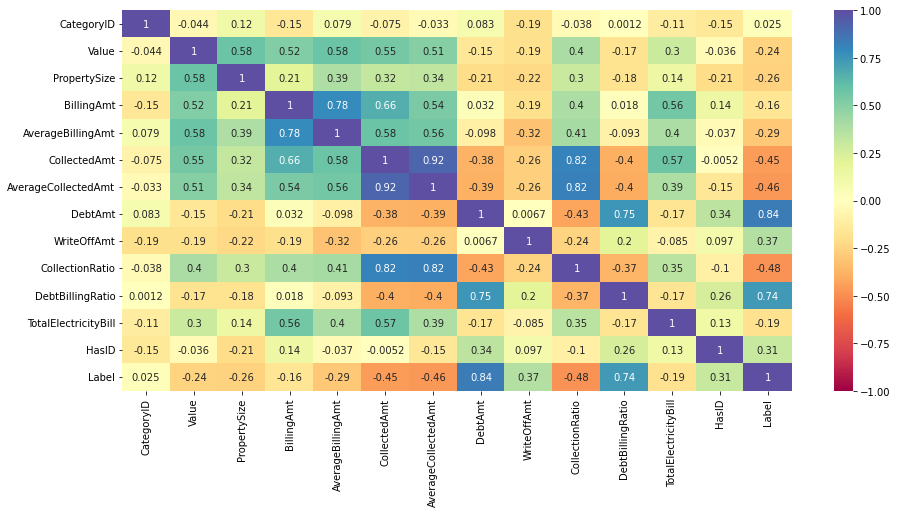

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

## Data Preprocessing

This will feature missing value Treatment, outlier detection if needed, feature Engineering and data preparation for modelling.

### Outlier Detection

In [ ]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

**Display percentage outliers**

In [ ]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

CategoryID             19.990
Value                   8.518
PropertySize           16.629
BillingAmt             11.153
AverageBillingAmt      11.702
CollectedAmt           12.126
AverageCollectedAmt    13.116
DebtAmt                18.806
WriteOffAmt            10.792
CollectionRatio         2.644
DebtBillingRatio       19.983
TotalElectricityBill   24.603
HasID                   0.000
Label                   0.000
dtype: float64

In [ ]:
# Check Age extreme values
data.sort_values(by=["age_of_respondent"],ascending = False).head(5)

* Although age has outliers, it does not look extreme
* Age will be rescaled

In [ ]:
# Check household size extreme values
data.sort_values(by=["household_size"],ascending = False).head(5)

* Outlier Households will be removed.
* Those greater than or equal to 10

In [ ]:
data[(data.household_size>10)].shape

In [ ]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.household_size>10].index,inplace=True)

In [ ]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # categorical features to be onverted to One Hot Encoding
    categ = ["Category"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ, drop_first=True)

    # drop uniquid column
#    data = data.drop(["uniqueid", "job_type"], axis=1)
    data = data.drop(["AccID", "CollectedAmt","CategoryID"], axis=1)

    return data

In [ ]:
data.columns

Index(['AccID', 'CategoryID', 'Category', 'Value', 'PropertySize',
       'BillingAmt', 'AverageBillingAmt', 'CollectedAmt',
       'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt', 'CollectionRatio',
       'DebtBillingRatio', 'TotalElectricityBill', 'HasID', 'Label'],
      dtype='object')

Preprocess both train and test dataset.

In [ ]:
# preprocess the train data
processed_train = preprocessing_data(data)
processed_test = preprocessing_data(test)

In [ ]:
processed_train.head()

,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown
0,2674700,585,43717,729,4342,0,0,0.990,0.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36000,315,378,3,522,0,0,1.380,0.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,700000,528,25150,345,349,0,0,1.000,0.000,10715,1,0,0,0,0,0,0,0,0,0,0,1,0
3,40000,0,4773,133,0,7319,0,0.000,1.530,0,1,1,0,0,0,0,0,0,1,0,0,0,0
4,125800,0,-4,0,445,0,0,-121.260,0.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Check size of Train and Test

print(processed_train.shape)
print(processed_test.shape)

(100476, 23)
(33493, 22)


In [ ]:
set(processed_train.columns) - set(processed_test.columns)

{'Category_Environmental Management', 'Label'}

In [ ]:
processed_test["Category_Environmental Management"] = 0

* The target column in the train accounts for the extra column

In [ ]:
set(processed_train.columns) - set(processed_test.columns)

{'Label'}

### Data Preparation for Modeling

In [ ]:
X = processed_train.drop(["Label"], axis=1)
y = processed_train["Label"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(60285, 22) (20095, 22) (20096, 22)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 60285
Number of rows in validation data = 20095
Number of rows in test data = 20096


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.539
1   0.461
Name: Label, dtype: float64
Percentage of classes in validation set:
0   0.539
1   0.461
Name: Label, dtype: float64
Percentage of classes in test set:
0   0.539
1   0.461
Name: Label, dtype: float64


# Model building

## Introduction

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attrit and does not - Loss of resources
2. Predicting a customer will not attrit but does - Loss of opportunity

#### Which case is more important?
* Predicting a customer will not attrit but does i.e. losing on a potential customer which comes at a great loss for the bank.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
cv_score = [] # Empty list to store all model's mean CV scores
cv_std = [] # Empty list to store all model's CV Standard Deviation


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    cv_score.append(cv_result.mean() * 100)
    cv_std.append(cv_result.std() * 100)
    names.append(name + " base")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))


Cross-Validation Performance:

Logistic Regression: 97.13193767174648, 0.4664761192737529%
Random forest: 99.75118078369943, 0.04063812364749153%
GBM: 99.73625210949555, 0.05321481913631401%
Adaboost: 99.75947595909747, 0.03800612922984287%
Xgboost: 99.76279298365795, 0.036382193176154376%
dtree: 99.50733751697584, 0.07641221454696555%


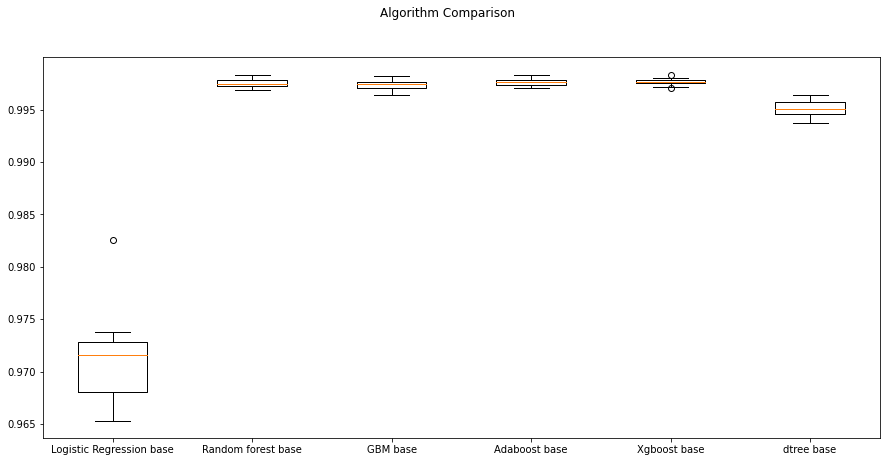

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Training Performance

In [ ]:
print("\n" "Training Performance:" "\n")

score = []

for name, model in models:
    model.fit(X_train, y_train)
    scores = accuracy_score(y_train, model.predict(X_train)) * 100
    score.append(scores)
    print("{}: {}".format(name, scores))

## Summary (Base Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Gradient Boost
- The boxplot shows that the performance of xgboost is consistent with no outlier. However, Adaboost seems to be the most consistent.
- So far, the Performance of Xgboost and Gradient Boost is highest on cross-validation.

# Model building - Oversampled data

## Oversampling train data using SMOTE

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
cv_score_over = [] # Empty list to store all model's mean CV scores
cv_std_over = [] # Empty list to store all model's mean CV scores


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    cv_score_over.append(cv_result.mean() * 100)
    cv_std_over.append(cv_result.std() * 100)
    names_over.append(name + " over")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

### Training Performance

In [ ]:
print("\n" "Training Performance:" "\n")

score_over = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = accuracy_score(y_train_over, model.predict(X_train_over)) * 100
    score_over.append(scores)
    print("{}: {}".format(name, scores))

## Summary (Oversampled Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Random Forest Classifier
- The boxplot shows that the performance of xgboost is consistent as well of that of the random forest classifier.
- So far, the Performance of Xgboost and Random Forest is highest on cross-validation.

# Model building - Undersampled data

## Undersampling train data using Random Under Sampler

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
cv_score_un = [] # Empty list to store all model's mean CV scores
cv_std_un = [] # Empty list to store all model's mean CV scores


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_un:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result)
    cv_score_un.append(cv_result.mean() * 100)
    cv_std_un.append(cv_result.std() * 100)
    names_un.append(name + " under")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

## Training Performance

In [ ]:
print("\n" "Training Performance:" "\n")

score_un = []

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = accuracy_score(y_train_un, model.predict(X_train_un)) * 100
    score_un.append(scores)
    print("{}: {}".format(name, scores))

## Summary (Undersampled Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Gradient Boost
- The boxplot shows that the performance of xgboost is consistent with no outlier. Gradient Boost follows closely without outliers.
- So far, the Performance of Xgboost and Gradient Boost is highest on cross-validation.

# Hyperparameter tuning using random search

## Comparing Model Performance

So far, 18 models have been built. This section will compare the performance of all the models to choose the best three models that will undergo hyperparameter tuning

In [ ]:
# Model performance comparison

model_comp = pd.DataFrame(list(zip(names + names_over + names_un,
                                   score + score_over + score_un,
                                   cv_score + cv_score_over + cv_score_un,
                                   cv_std + cv_std_over + cv_std_un)
                              ),

               columns =['Name', 'Training Score', 'CV Score', 'Standard Deviation'])

print("Model performance comparison:")

# CV score has to be very high while STD has to be very low
# New variables Alpha compares all the models
# The Higher the Alpha, the better the model

# Creation of Alpha
model_comp['Alpha'] = model_comp['CV Score']/model_comp['Standard Deviation']

# Sort by Alpha and CV Score
model_comp.sort_values(by = ['CV Score'], ascending = False)

### Summary (All Models)

- We can see that Xgboost on oversampling is giving the highest cross-validated recall followed by Random Forest on Oversampling.
- XGboost on oversampling outperformed all other models in CV Score and stability.
- Although Gradient Boost has a slightly lower CV score than Random Forest, It is nire stable than random forest.
- So far, the Performance of Xgboost , Random Forest, and Gradient Boost is highest on cross-validation.

## Hyperparameter Tuning

**We will tune Xgboost, Random Forest and Gradient Boost oversampled models using RandomizedSearchCV. We will also compare the performance and time taken by these three methods**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Gradient Boost

In [ ]:
%%time

# Choose the type of classifier.
model = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=75, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
gb_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train,y_train)

In [ ]:
# Calculating different metrics on train set
gb_grid_train = model_performance_classification_sklearn(
    gb_tuned, X_train,y_train
)
print("Training performance:")
gb_grid_train

In [ ]:
# Calculating different metrics on validation set
gb_grid_val = model_performance_classification_sklearn(gb_tuned, X_val, y_val)
print("Validation performance:")
gb_grid_val

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(gb_tuned, X_val, y_val)

* The model is slightly overfitting

### XGBoost

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
xgb_tunedCV = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tunedCV.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tunedCV.best_params_,xgb_tunedCV.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.9976279339802604:
CPU times: user 15.6 s, sys: 951 ms, total: 16.6 s
Wall time: 19min 15s


In [ ]:
# building model with best parameters
xgb_tuned2 = xgb_tunedCV.best_estimator_

# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train,y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.998,0.995,1.000,0.998


In [ ]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.998,0.995,1.000,0.998


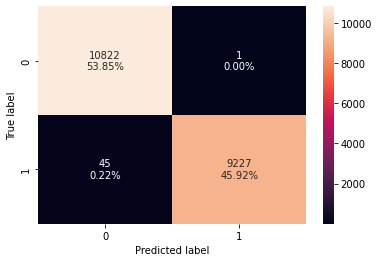

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

* The model is rightly fitted

### XGBoost Oversampled

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators': Integer(50,300),
              'subsample':Real(0.5,1.0),
              'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
              'colsample_bytree':Real(0.5,1.0),
              'colsample_bylevel':Real(0.5,1.0),
              'min_child_weight':Real(0,10),
              'max_depth':Integer(0,10),
              'learning_rate': Real(1e-4, 1e+1, prior='log-uniform'),
              'scale_pos_weight':Real(0,10),
              'reg_lambda': Real(1e-6, 1e+1, prior='log-uniform'),
              }

bayes_search = BayesSearchCV(
    xgb_tuned,
    parameters,
    n_iter=100,
    cv=5,
    scoring = 'accuracy'
)
bayes_search.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(bayes_search.best_params_,bayes_search.best_score_))

In [ ]:
bayes_search.best_params_

In [ ]:
# building model with best parameters
xgb_tuned = bayes_search.best_estimator_

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

In [ ]:
# Calculating different metrics on train set
xgboost_random_train_bayes = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgboost_random_train_bayes

In [ ]:
# Calculating different metrics on validation set
xgboost_random_val_bayes = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgboost_random_val_bayes

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

* The model is rightly fitted

# Model Performances

## Comparing best three tuned Models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gb_grid_train.T,
        xgboost_random_train.T,
        xgboost_random_train_bayes.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Xgboost Tuned with Random search",
    "Xgboost Tuned with Bayes search",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gb_grid_val.T,
        xgboost_random_val.T,
        xgboost_random_val_bayes.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Xgboost Tuned with Random search",
    "Xgboost Tuned with Bayes search",
]
print("Validation performance comparison:")
models_val_comp_df

- The xgboost model tuned using Grid search is giving the best validation recall of 0.985 but it has the low values of train and validation precision.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

## Best Model Performance on the test set

In [ ]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Test performance:")
xgboost_grid_test

- The performance on test data is generalised

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Retrain Model for Production

In [ ]:
# Splitting the data into train and test sets
X_train_fn, X_test_fn, y_train_fn, y_test_fn = train_test_split(
    X, y, test_size=0.05, random_state=1, stratify=y
)
print(X_train_fn.shape, X_test_fn.shape)

(95452, 22) (5024, 22)


In [ ]:
xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_final = XGBClassifier(eval_metric='logloss')

In [ ]:
# Fit the model on training data
xgb_final.fit(X_train_fn, y_train_fn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Calculating different metrics on train set
xgboost_final_train = model_performance_classification_sklearn(
    xgb_final, X_train_fn, y_train_fn
)
print("Training performance:")
xgboost_final_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.997,1.000,0.998


In [ ]:
# Calculating different metrics on validation set
xgboost_final_test = model_performance_classification_sklearn(xgb_final, X_test, y_test)
print("Testing performance:")
xgboost_final_test

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.997,1.000,0.999


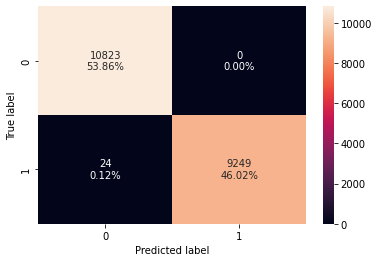

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_final, X_test, y_test)

# Submission

###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [ ]:
# Get the predicted result for the test Data
test.Label = xgb_final.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"AccID": test["AccID"],
                           "Label": test.Label})

Let’s observe the sample results from our submission DataFrame.


In [ ]:
#show the five sample
submission.sample(5)

,AccID,Label
26506,07a0a576-f18b-48c9-9365-afcdce968cff,1
7484,d028620f-1571-4c53-ac6d-b3d243bbd166,0
27450,3e882d95-fa7d-4c79-a845-f31bc63d440b,1
1094,3f26b79a-a95f-4448-a583-a368b935d318,1
13381,dcd50f68-4808-4e8c-8e81-f98f257ee3d5,0


Save results in the CSV file.


In [ ]:
# Create submission csv file csv file
submission.to_csv('submission' + '_' + datetime.now().strftime("%H:%M:%S").replace(":", "") + ".csv", index = False)
print('submission' + '_' + datetime.now().strftime("%H:%M:%S").replace(":", "") + ".csv")

submission_075948.csv
